In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("file:///Users/raghad/Desktop/loan-campaign/loan_data_balanced_MM.csv", index_col=0)

In [3]:
m=df
X=m.drop('TARGET', axis=1)
y=df["TARGET"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=0)

In [ ]:
#neural network model on balanced and normalized data 

In [4]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='logistic',hidden_layer_sizes=(3),max_iter=500, solver='lbfgs')
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2699   20]
 [ 413 2344]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2719
           1       0.99      0.85      0.92      2757

    accuracy                           0.92      5476
   macro avg       0.93      0.92      0.92      5476
weighted avg       0.93      0.92      0.92      5476



In [6]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
(tn, fp, fn, tp)

(2699, 20, 413, 2344)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.920927684441198

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, predictions)



0.9915397631133672

In [13]:
recall_score(y_test, predictions)

0.8501994922016685

In [14]:
f1_score(y_test, predictions)

0.9154462019136888

In [15]:
class_names = np.array(['0', '1'])

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
        print('Confusion matrix, without normalizing')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Value',
           xlabel='Predicted Value')

    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[2699   20]
 [ 413 2344]]


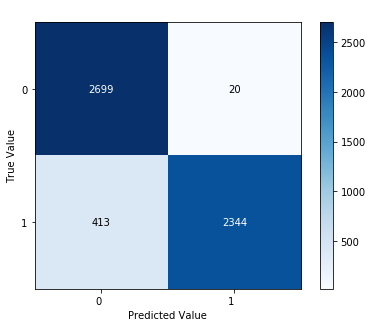

In [17]:
plot_confusion_matrix(y_test, predictions, classes=class_names, title=' ')

In [18]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, mlp.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc = auc(fpr, tpr)
roc_auc

0.9534989540816428

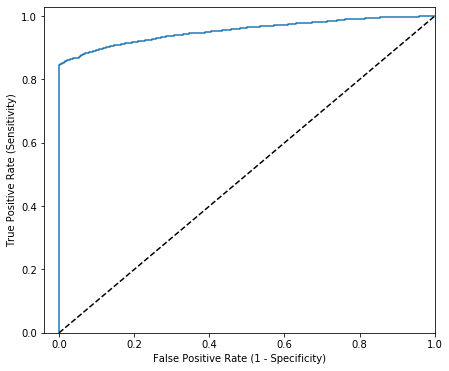

In [19]:
plt.figure(figsize=(7,6))
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.04, 1])
plt.ylim([0, 1.03])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.show()

In [20]:
mlp2 = MLPClassifier(activation='logistic',hidden_layer_sizes=(5),max_iter=500,solver='lbfgs')
mlp2.fit(X_train,y_train)
predictions2 = mlp2.predict(X_test)

In [21]:
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[2644   75]
 [ 384 2373]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2719
           1       0.97      0.86      0.91      2757

    accuracy                           0.92      5476
   macro avg       0.92      0.92      0.92      5476
weighted avg       0.92      0.92      0.92      5476



In [22]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,predictions2).ravel()
(tn2, fp2, fn2, tp2)

(2644, 75, 384, 2373)

In [24]:
accuracy_score(y_test, predictions2)

0.9161796932067202

In [25]:
precision_score(y_test, predictions2)

0.9693627450980392

In [28]:
recall_score(y_test, predictions)

0.8501994922016685

In [29]:
f1_score(y_test, predictions)

0.9154462019136888

Confusion matrix, without normalization
[[2644   75]
 [ 384 2373]]


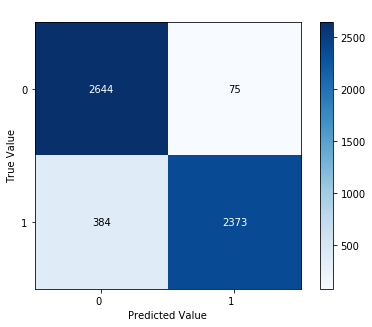

In [30]:
plot_confusion_matrix(y_test, predictions2, classes=class_names, title=' ')

In [31]:
fpr2, tpr2, threshold = roc_curve(y_test, mlp2.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.9561041118645067

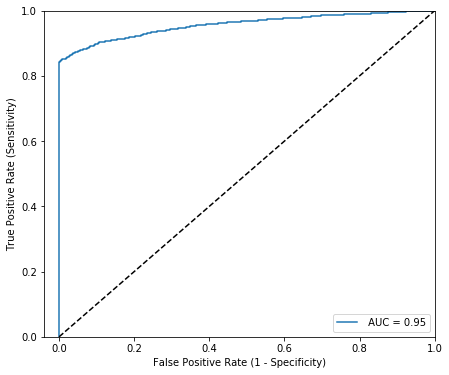

In [33]:
plt.figure(figsize=(7,6))
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, label = ' AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.04, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')

plt.show()

In [ ]:
###################

In [34]:
mlp3 = MLPClassifier(activation='logistic',hidden_layer_sizes=(3,5),max_iter=500,solver='lbfgs')
mlp3.fit(X_train,y_train)
predictions3 = mlp3.predict(X_test)

In [35]:
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[2709   10]
 [ 407 2350]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2719
           1       1.00      0.85      0.92      2757

    accuracy                           0.92      5476
   macro avg       0.93      0.92      0.92      5476
weighted avg       0.93      0.92      0.92      5476



In [36]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_test,predictions3).ravel()
(tn3, fp3, fn3, tp3)

(2709, 10, 407, 2350)

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions3)

0.9238495252008766

In [38]:
precision_score(y_test, predictions3)

0.9957627118644068

In [39]:
recall_score(y_test, predictions3)

0.8523757707653247

In [40]:
f1_score(y_test, predictions3)

0.9185069376587846

Confusion matrix, without normalization
[[2709   10]
 [ 407 2350]]


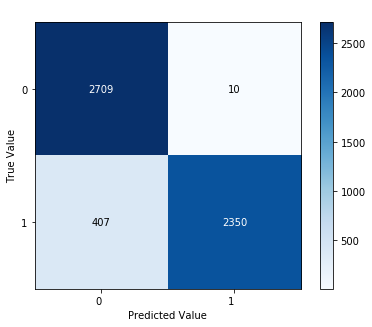

In [41]:
plot_confusion_matrix(y_test, predictions3, classes=class_names, title=' ')

In [44]:
fpr3, tpr3, threshold = roc_curve(y_test, mlp3.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc3 = auc(fpr3, tpr3)
roc_auc3

0.9553335966638399

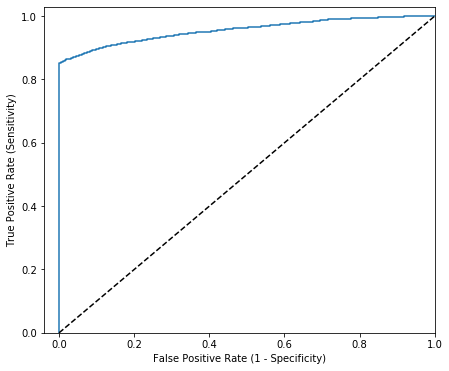

In [46]:
plt.figure(figsize=(7,6))
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3)
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.04, 1])
plt.ylim([0, 1.03])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')

plt.show()

In [ ]:
####################### neural netwrok perfromance on WoE encoded and balanced data

In [47]:
df2 = pd.read_csv("file:///Users/raghad/Desktop/loan-campaign/woe_data_balanced.csv", index_col=0)

In [48]:
df2

,TARGET,AGE_woe,GENDER_woe,BALANCE_woe,OCCUPATION_woe,SCR_woe,HOLDING_PERIOD_woe,ACC_TYPE_woe,LEN_OF_RLTN_IN_MNTH_woe,NO_OF_L_CR_TXNS_woe,...,AMT_L_DR_woe,FLG_HAS_ANY_CHGS_woe,AMT_MIN_BAL_NMC_CHGS_woe,AVG_AMT_PER_ATM_TXN_woe,AVG_AMT_PER_CSH_WDL_TXN_woe,AVG_AMT_PER_CHQ_TXN_woe,AVG_AMT_PER_NET_TXN_woe,AVG_AMT_PER_MOB_TXN_woe,FLG_HAS_NOMINEE_woe,FLG_HAS_OLD_LOAN_woe
1,0,-0.276443,0.049751,0.283279,0.545144,0.328882,-1.010341,-0.105594,-0.048737,-0.175666,...,-0.081759,-0.051855,0,0.149579,-0.172017,-0.297045,0.080085,-0.139161,0.005779,-0.035084
2,0,0.254207,0.049751,0.024851,-0.254044,0.041719,-1.010341,-0.105594,0.055594,0.042810,...,-0.081759,0.366872,0,-0.060077,-0.172017,-0.297045,-0.095503,-0.139161,0.005779,0.033580
3,0,0.122605,0.049751,0.283279,0.545144,0.328882,0.744519,-0.105594,0.055594,0.042810,...,0.316692,0.366872,0,0.149579,0.165008,0.188094,0.355925,-0.139161,0.005779,-0.035084
4,0,-0.142227,0.049751,0.283279,-0.254044,-0.488300,0.136303,0.352876,0.055594,0.899322,...,0.316692,-0.051855,0,0.149579,-0.029742,0.188094,0.080085,0.354801,0.005779,0.033580
5,0,-0.090199,0.049751,-0.678547,0.002758,-0.488300,-0.652702,-0.105594,0.059568,0.374320,...,-0.081759,-0.051855,0,-0.351980,-0.159406,-0.297045,-0.195852,-0.139161,0.005779,0.033580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18326,1,-0.126658,0.049751,0.102186,-0.137215,0.328882,0.013549,-0.105594,-0.036146,0.042810,...,-0.081759,0.366872,0,0.255244,-0.172017,0.219205,0.442773,-0.139161,0.005779,-0.035084
18327,1,-0.140642,0.049751,-0.327177,-0.190905,0.328882,0.123809,-0.105594,0.046257,0.042810,...,-0.081759,-0.039101,0,0.295774,-0.172017,0.292057,0.442773,-0.139161,0.005779,0.031489
18328,1,-0.130739,0.049751,-0.207327,-0.152884,0.328882,0.045726,-0.105594,-0.012098,0.042810,...,-0.081759,0.040603,0,0.267072,-0.172017,0.292057,0.442773,-0.139161,0.005779,0.018419
18329,1,-0.090199,0.049751,0.123377,-0.156139,0.328882,0.744519,0.352876,-0.134095,0.899322,...,0.316692,0.207233,0,0.300367,0.265384,0.127732,-0.195852,0.585998,0.005779,0.033580


In [49]:
m=df2
X=m.drop('TARGET', axis=1)
y=df2["TARGET"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=0)

In [50]:
mlp4 = MLPClassifier(activation='logistic',hidden_layer_sizes=(3),max_iter=500,solver='lbfgs')
mlp4.fit(X_train,y_train)
predictions4 = mlp4.predict(X_test)

In [51]:
print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))

[[1792  880]
 [ 813 2014]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2672
           1       0.70      0.71      0.70      2827

    accuracy                           0.69      5499
   macro avg       0.69      0.69      0.69      5499
weighted avg       0.69      0.69      0.69      5499



In [52]:
tn4, fp4, fn4, tp4 = confusion_matrix(y_test,predictions4).ravel()
(tn4, fp4, fn4, tp4)

(1792, 880, 813, 2014)

In [53]:
accuracy_score(y_test, predictions4)

0.6921258410620112

In [54]:
precision_score(y_test, predictions4)

0.695922598479613

In [55]:
recall_score(y_test, predictions4)

0.7124159886805801

In [56]:
f1_score(y_test, predictions4)

0.7040727145603917

Confusion matrix, without normalization
[[1792  880]
 [ 813 2014]]


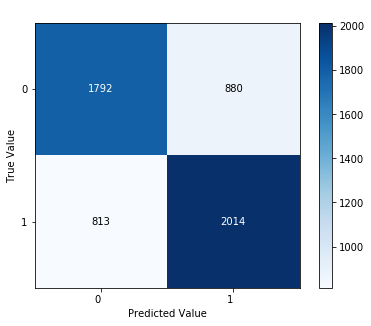

In [57]:
plot_confusion_matrix(y_test, predictions4, classes=class_names, title=' ')

In [58]:
fpr4, tpr4, threshold = roc_curve(y_test, mlp4.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc4 = auc(fpr4, tpr4)
roc_auc4

0.7611630735698748

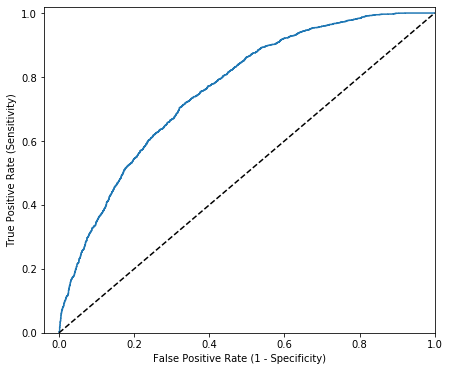

In [59]:
plt.figure(figsize=(7,6))
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr4, tpr4)
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.04, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')

plt.show()

In [60]:
mlp5 = MLPClassifier(activation='logistic',hidden_layer_sizes=(5),max_iter=500,solver='lbfgs')
mlp5.fit(X_train,y_train)
predictions5 = mlp5.predict(X_test)

In [61]:
print(confusion_matrix(y_test,predictions5))
print(classification_report(y_test,predictions5))

[[1478 1194]
 [ 533 2294]]
              precision    recall  f1-score   support

           0       0.73      0.55      0.63      2672
           1       0.66      0.81      0.73      2827

    accuracy                           0.69      5499
   macro avg       0.70      0.68      0.68      5499
weighted avg       0.70      0.69      0.68      5499



In [62]:
tn5, fp5, fn5, tp5 = confusion_matrix(y_test,predictions5).ravel()
(tn5, fp5, fn5, tp5)

(1478, 1194, 533, 2294)

In [63]:
accuracy_score(y_test, predictions5)

0.6859428987088562

In [64]:
precision_score(y_test, predictions5)

0.6576834862385321

In [65]:
recall_score(y_test, predictions5)

0.8114609126282278

In [66]:
f1_score(y_test, predictions5)

0.7265241488519398

Confusion matrix, without normalization
[[1478 1194]
 [ 533 2294]]


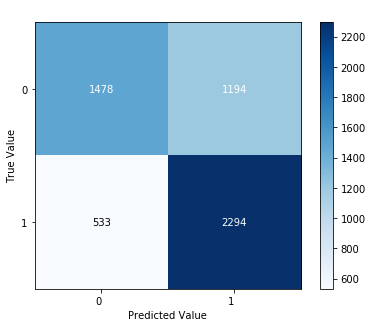

In [67]:
plot_confusion_matrix(y_test, predictions5, classes=class_names, title=' ')

In [68]:
fpr5, tpr5, threshold = roc_curve(y_test, mlp5.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc5 = auc(fpr5, tpr5)
roc_auc5

0.7559509562410376

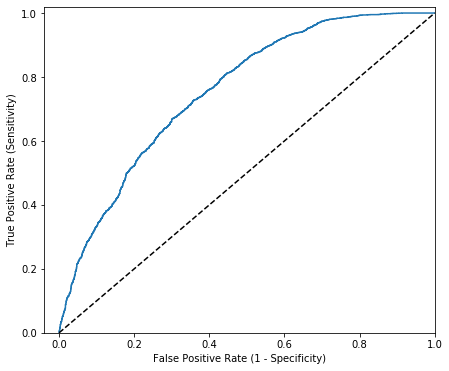

In [69]:
plt.figure(figsize=(7,6))
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr5, tpr5)
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.04, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')

plt.show()

In [162]:
mlp6 = MLPClassifier(activation='logistic',hidden_layer_sizes=(3,5), max_iter=500, solver='lbfgs')
mlp6.fit(X_train,y_train)
predictions6 = mlp6.predict(X_test)

In [163]:
print(confusion_matrix(y_test,predictions6))
print(classification_report(y_test,predictions6))

[[1591 1081]
 [ 607 2220]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.65      2672
           1       0.67      0.79      0.72      2827

    accuracy                           0.69      5499
   macro avg       0.70      0.69      0.69      5499
weighted avg       0.70      0.69      0.69      5499



In [164]:
tn6, fp6, fn6, tp6 = confusion_matrix(y_test,predictions6).ravel()
(tn6, fp6, fn6, tp6)

(1591, 1081, 607, 2220)

In [165]:
accuracy_score(y_test, predictions6)

0.6930350972904165

In [172]:
precision_score(y_test, predictions6)

0.67252347773402

In [173]:
recall_score(y_test, predictions6)

0.7852847541563495

In [174]:
f1_score(y_test, predictions6)

0.7245430809399478

Confusion matrix, without normalization
[[1591 1081]
 [ 607 2220]]


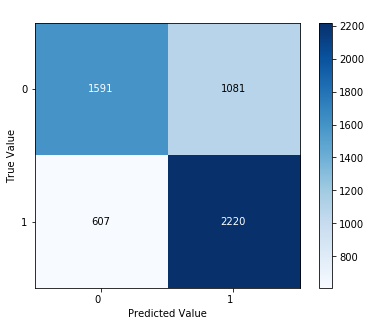

In [176]:
plot_confusion_matrix(y_test, predictions6, classes=class_names, title=' ')

In [177]:
fpr6, tpr6, threshold = roc_curve(y_test, mlp6.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc6 = auc(fpr6, tpr6)
roc_auc6

0.758351752455471

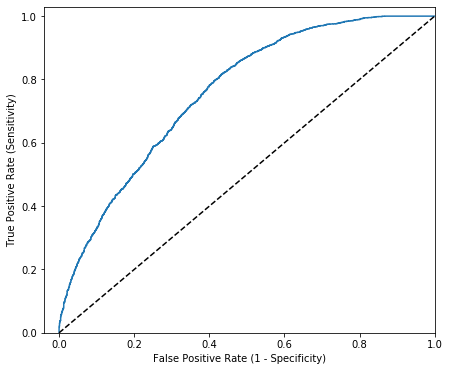

In [179]:
plt.figure(figsize=(7,6))
#plt.title('Receiver Operating Characteristic')
plt.plot(fpr6, tpr6)
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.04, 1])
plt.ylim([0, 1.03])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.show()

In [ ]:
################# neural network perfromance on the imbalanced normalized dataset

In [183]:
df3 = pd.read_csv("file:///Users/raghad/Desktop/loan-campaign/loan_data_encoded1h_MM.csv", index_col=0)

In [184]:
df3

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,...,ACC.TYPE.SA,FLG.HAS.CC.0,FLG.HAS.CC.1,FLG.HAS.ANY.CHGS.0,FLG.HAS.ANY.CHGS.1,FLG.HAS.NOMINEE.0,FLG.HAS.NOMINEE.1,FLG.HAS.OLD.LOAN.0,FLG.HAS.OLD.LOAN.1,TARGET
1,0.176471,0.000405,0.751947,0.966667,0.609375,0.093333,0.040541,0.067114,0.000000,0.04,...,1,1,0,1,0,0,1,0,1,0
2,0.764706,0.034387,0.249166,0.900000,0.390625,0.106667,0.027027,0.067114,0.000000,0.04,...,1,1,0,0,1,0,1,1,0,0
3,0.558824,0.002179,0.559511,0.033333,0.166667,0.133333,0.067568,0.100671,0.066667,0.04,...,1,1,0,0,1,0,1,0,1,0
4,0.941176,0.008579,0.106785,0.400000,0.406250,0.480000,0.189189,0.335570,0.266667,0.08,...,0,1,0,1,0,0,1,1,0,0
5,0.441176,0.199945,0.074527,0.766667,0.812500,0.266667,0.013514,0.140940,0.066667,0.00,...,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10251,0.558824,0.026315,0.338154,0.166667,0.067708,0.026667,0.027027,0.026846,0.066667,0.00,...,1,1,0,1,0,0,1,1,0,0
10252,0.588235,0.005371,0.153504,0.266667,0.010417,0.133333,0.067568,0.100671,0.066667,0.04,...,1,1,0,1,0,0,1,1,0,0
10253,0.411765,0.156676,0.123471,0.133333,0.921875,0.146667,0.135135,0.140940,0.333333,0.04,...,1,1,0,1,0,0,1,1,0,0
10254,0.588235,0.011728,0.135706,0.500000,0.604167,0.093333,0.094595,0.093960,0.200000,0.04,...,1,1,0,1,0,0,1,0,1,1


In [187]:
m=df3
X=m.drop('TARGET', axis=1)
y=df3["TARGET"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=0)

In [188]:
y_train.value_counts()

0    6337
1     841
Name: TARGET, dtype: int64

In [189]:
mlp7 = MLPClassifier(activation='logistic',hidden_layer_sizes=(3),max_iter=500, solver='lbfgs')
mlp7.fit(X_train,y_train)
predictions7 = mlp7.predict(X_test)

In [193]:
print(confusion_matrix(y_test,predictions7))
print(classification_report(y_test,predictions7))

[[2720   20]
 [ 328    9]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2740
           1       0.31      0.03      0.05       337

    accuracy                           0.89      3077
   macro avg       0.60      0.51      0.49      3077
weighted avg       0.83      0.89      0.84      3077



In [194]:
tn7, fp7, fn7, tp7 = confusion_matrix(y_test,predictions7).ravel()
(tn7, fp7, fn7, tp7)

(2720, 20, 328, 9)

In [195]:
accuracy_score(y_test, predictions7)

0.8869028274293143

In [200]:
precision_score(y_test, predictions7)

0.3103448275862069

In [201]:
recall_score(y_test, predictions7)

0.026706231454005934

In [202]:
f1_score(y_test, predictions7)

0.049180327868852465

In [203]:
fpr7, tpr7, threshold = roc_curve(y_test, mlp7.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc7 = auc(fpr7, tpr7)
roc_auc7

0.6980084039073837

In [204]:
mlp8 = MLPClassifier(activation='logistic',hidden_layer_sizes=(5),max_iter=500, solver='lbfgs')
mlp8.fit(X_train,y_train)
predictions8 = mlp8.predict(X_test)

In [205]:
print(confusion_matrix(y_test,predictions8))
print(classification_report(y_test,predictions8))

[[2706   34]
 [ 322   15]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2740
           1       0.31      0.04      0.08       337

    accuracy                           0.88      3077
   macro avg       0.60      0.52      0.51      3077
weighted avg       0.83      0.88      0.84      3077



In [212]:
tn8, fp8, fn8, tp8 = confusion_matrix(y_test,predictions8).ravel()
(tn8, fp8, fn8, tp8)

(2706, 34, 322, 15)

In [214]:
accuracy_score(y_test, predictions8)

0.8843028924276893

In [215]:
precision_score(y_test, predictions8)

0.30612244897959184

In [216]:
recall_score(y_test, predictions8)

0.04451038575667656

In [217]:
f1_score(y_test, predictions8)

0.07772020725388602

In [218]:
fpr8, tpr8, threshold = roc_curve(y_test, mlp8.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc8 = auc(fpr8, tpr8)
roc_auc8

0.6787167796573459

In [231]:
mlp9 = MLPClassifier(activation='logistic',hidden_layer_sizes=(3,5),max_iter=500, solver='lbfgs')
mlp9.fit(X_train,y_train)
predictions9 = mlp9.predict(X_test)

In [232]:
print(confusion_matrix(y_test,predictions9))
print(classification_report(y_test,predictions9))

[[2713   27]
 [ 319   18]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2740
           1       0.40      0.05      0.09       337

    accuracy                           0.89      3077
   macro avg       0.65      0.52      0.52      3077
weighted avg       0.84      0.89      0.85      3077



In [233]:
tn9, fp9, fn9, tp9 = confusion_matrix(y_test,predictions9).ravel()
(tn9, fp9, fn9, tp9)

(2713, 27, 319, 18)

In [234]:
accuracy_score(y_test, predictions9)

0.8875528111797205

In [235]:
precision_score(y_test, predictions9)

0.4

In [239]:
recall_score(y_test, predictions9)

0.05341246290801187

In [240]:
f1_score(y_test, predictions9)

0.09424083769633507

In [242]:
fpr9, tpr9, threshold = roc_curve(y_test, mlp9.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc9 = auc(fpr9, tpr9)
roc_auc9

0.6940143819445949

In [ ]:
################################## neural network perfromance on WoE encoded imbalanced data

In [243]:
df4 = pd.read_csv("file:///Users/raghad/Desktop/loan-campaign/woe_data.csv", index_col=0)

In [253]:
m=df4
X=m.drop('TARGET', axis=1)
y=df4["TARGET"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=0)

In [254]:
mlp10 = MLPClassifier(activation='logistic',hidden_layer_sizes=(3),max_iter=500, solver='lbfgs')
mlp10.fit(X_train,y_train)
predictions10 = mlp10.predict(X_test)

In [255]:
print(confusion_matrix(y_test,predictions10))
print(classification_report(y_test,predictions10))

[[2701   39]
 [ 308   29]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2740
           1       0.43      0.09      0.14       337

    accuracy                           0.89      3077
   macro avg       0.66      0.54      0.54      3077
weighted avg       0.85      0.89      0.85      3077



In [256]:
tn10, fp10, fn10, tp10 = confusion_matrix(y_test,predictions10).ravel()
(tn10, fp10, fn10, tp10)

(2701, 39, 308, 29)

In [257]:
accuracy_score(y_test, predictions10)

0.8872278193045174

In [258]:
precision_score(y_test, predictions10)

0.4264705882352941

In [259]:
recall_score(y_test, predictions10)

0.08605341246290801

In [260]:
f1_score(y_test, predictions10)

0.14320987654320985

In [261]:
fpr10, tpr10, threshold = roc_curve(y_test, mlp10.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc10 = auc(fpr10, tpr10)
roc_auc10

0.7333502999848382

In [262]:
mlp11 = MLPClassifier(activation='logistic',hidden_layer_sizes=(5),max_iter=500, solver='lbfgs')
mlp11.fit(X_train,y_train)
predictions11 = mlp11.predict(X_test)

In [263]:
print(confusion_matrix(y_test,predictions11))
print(classification_report(y_test,predictions11))

[[2697   43]
 [ 305   32]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2740
           1       0.43      0.09      0.16       337

    accuracy                           0.89      3077
   macro avg       0.66      0.54      0.55      3077
weighted avg       0.85      0.89      0.85      3077



In [264]:
tn11, fp11, fn11, tp11 = confusion_matrix(y_test,predictions11).ravel()
(tn11, fp11, fn11, tp11)

(2697, 43, 305, 32)

In [265]:
accuracy_score(y_test, predictions11)

0.8869028274293143

In [266]:
precision_score(y_test, predictions11)

0.4266666666666667

In [267]:
recall_score(y_test, predictions11)

0.09495548961424333

In [268]:
f1_score(y_test, predictions11)

0.15533980582524273

In [269]:
fpr11, tpr11, threshold = roc_curve(y_test, mlp11.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc11 = auc(fpr11, tpr11)
roc_auc11

0.7118661872685136

In [270]:
mlp12 = MLPClassifier(activation='logistic',hidden_layer_sizes=(3,5),max_iter=500, solver='lbfgs')
mlp12.fit(X_train,y_train)
predictions12 = mlp12.predict(X_test)

In [271]:
print(confusion_matrix(y_test,predictions12))
print(classification_report(y_test,predictions12))

[[2714   26]
 [ 301   36]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2740
           1       0.58      0.11      0.18       337

    accuracy                           0.89      3077
   macro avg       0.74      0.55      0.56      3077
weighted avg       0.87      0.89      0.86      3077



In [272]:
tn12, fp12, fn12, tp12 = confusion_matrix(y_test,predictions12).ravel()
(tn12, fp12, fn12, tp12)

(2714, 26, 301, 36)

In [273]:
accuracy_score(y_test, predictions12)

0.8937276568085798

In [274]:
precision_score(y_test, predictions12)

0.5806451612903226

In [275]:
recall_score(y_test, predictions12)

0.10682492581602374

In [276]:
f1_score(y_test, predictions12)

0.18045112781954886

In [277]:
fpr12, tpr12, threshold = roc_curve(y_test, mlp12.predict_proba(X_test)[:,1], pos_label= 1)
roc_auc12 = auc(fpr12, tpr12)
roc_auc12

0.7384717017912452